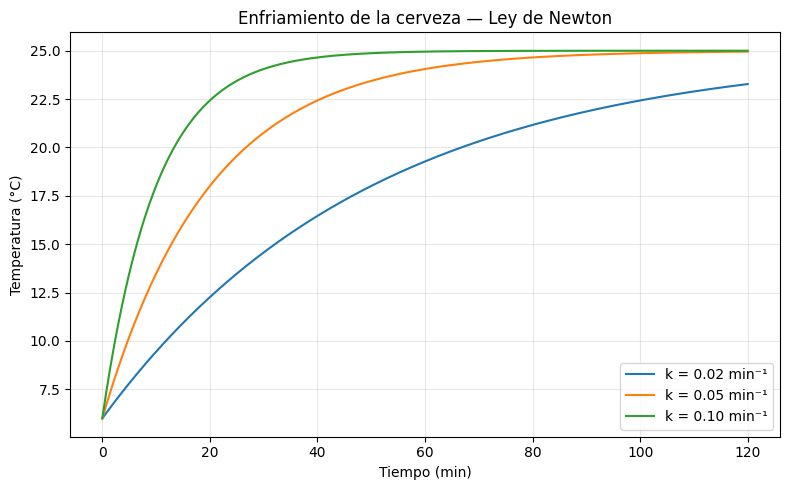

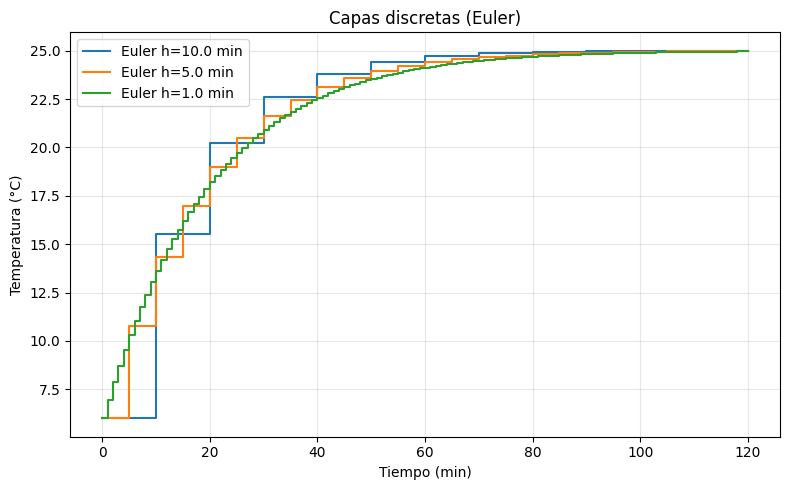

    t (min)  T (°C)
0         0    6.00
1        10   13.48
2        20   18.01
3        30   20.76
4        40   22.43
5        50   23.44
6        60   24.05
7        70   24.43
8        80   24.65
9        90   24.79
10      100   24.87
11      110   24.92
12      120   24.95


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parámetros del modelo ---
T0 = 6.0    # Temperatura inicial de la cerveza (°C)
Ta = 25.0   # Temperatura ambiente (°C)
ks = [0.02, 0.05, 0.10]  # Constantes de enfriamiento (min^-1)
t_max = 120.0  # Tiempo máximo en minutos
t = np.linspace(0, t_max, 601)

# --- Solución exacta: Ley de enfriamiento de Newton ---
def exact_solution(k, t):
    return Ta + (T0 - Ta) * np.exp(-k * t)

# --- Gráfica 1: Variación de k ---
plt.figure(figsize=(8,5))
for k in ks:
    plt.plot(t, exact_solution(k, t), label=f"k = {k:.2f} min⁻¹")
plt.xlabel("Tiempo (min)")
plt.ylabel("Temperatura (°C)")
plt.title("Enfriamiento de la cerveza — Ley de Newton")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Método de Euler explícito ---
def euler_explicit(k, T0, Ta, h, t_max):
    n_steps = int(np.ceil(t_max / h))
    times = np.linspace(0, n_steps*h, n_steps+1)
    T = np.zeros_like(times)
    T[0] = T0
    for i in range(n_steps):
        T[i+1] = T[i] + h * (-k * (T[i] - Ta))
    return times, T

# --- Gráfica 2: Solución continua vs discretas ---
k = 0.05
T_exact = exact_solution(k, t)
hs = [10.0, 5.0, 1.0]

plt.figure(figsize=(8,5))
#plt.plot(t, T_exact, label="Solución exacta (continuo)", linewidth=2)
for h in hs:
    times, T_e = euler_explicit(k, T0, Ta, h, t_max)
    plt.step(times, T_e, where='post', label=f"Euler h={h} min")
plt.xlabel("Tiempo (min)")
plt.ylabel("Temperatura (°C)")
plt.title("Capas discretas (Euler)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Tabla de datos ---
sample_times = np.arange(0, 121, 10)
sample_temps = exact_solution(0.05, sample_times)
df = pd.DataFrame({"t (min)": sample_times, "T (°C)": np.round(sample_temps, 2)})
print(df)


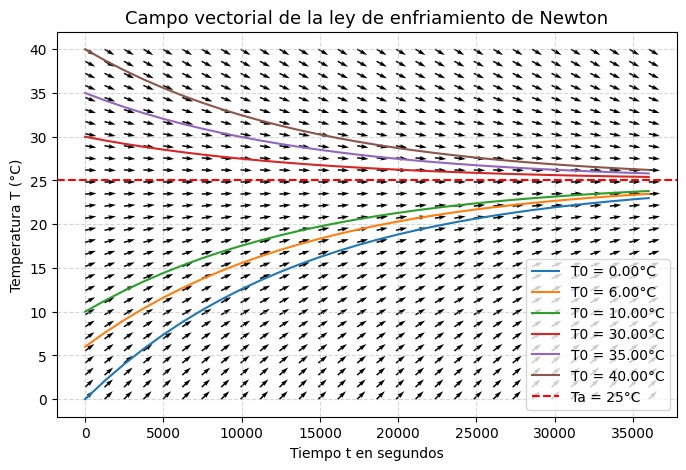

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T0 = [0.0, 6.0, 10.0, 30.0, 35.0, 40.0]
k = 7e-5          # constante de enfriamiento
Ta = 25         # temperatura ambiente (°C)
t_min, t_max = 0, 10*3600
T_min, T_max = 0, 40

# Malla de puntos (t, T)
t = np.linspace(t_min, t_max, 30)
T = np.linspace(T_min, T_max, 30)
T_grid, t_grid = np.meshgrid(T, t)

def exact_solution(Ta, T0, k, t):
    return Ta + (T0 - Ta) * np.exp(-k * t)

# Campo vectorial: dT/dt = -k (T - T_a)
dTdt = -k * (T_grid - Ta)
dt = np.ones_like(dTdt)

# Normalización para que las flechas se vean bien
magnitude = np.sqrt(dt**2 + dTdt**2)
dt /= magnitude
dTdt /= magnitude

# Gráfica del campo vectorial
plt.figure(figsize=(8, 5))
for T in T0:
    plt.plot(t, exact_solution(Ta, T, k, t), label=f"T0 = {T:.2f}°C")
plt.quiver(t_grid, T_grid, dt, dTdt, angles="xy")
plt.title("Campo vectorial de la ley de enfriamiento de Newton", fontsize=13)
plt.xlabel("Tiempo t en segundos")
plt.ylabel("Temperatura T (°C)")

# Temperatura ambiente
plt.axhline(Ta, color='r', linestyle='--', label=f"Ta = {Ta}°C")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("grafico_Campo_direccional.png", dpi=300)
plt.show()



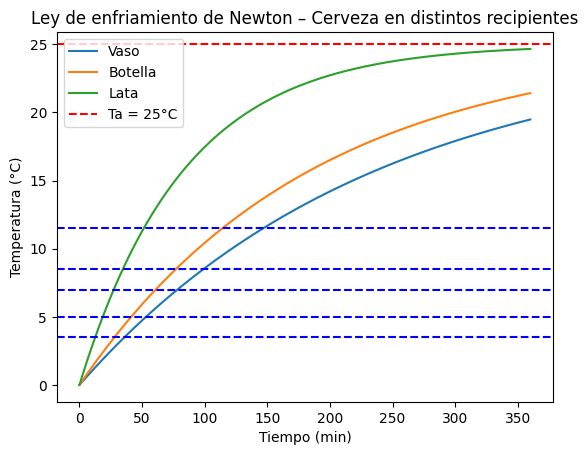

In [25]:
import numpy as np
import matplotlib.pyplot as plt

T_amb = 25
T0 = 0
t = np.linspace(0, 6*3600, 200)  # 4 horas en segundos
Ti = [3.5, 5.0, 7, 8.5, 11.5, ]

k_values = {
    "Vaso": 7e-5,
    "Botella": 9e-5,
    "Lata": 2e-4
}

for label, k in k_values.items():
    T = T_amb + (T0 - T_amb) * np.exp(-k * t)
    plt.plot(t/60, T, label=label)
for Ti_value in Ti:
    plt.axhline(Ti_value, color='b', linestyle='--')
plt.xlabel("Tiempo (min)")
plt.ylabel("Temperatura (°C)")
plt.axhline(Ta, color='r', linestyle='--', label=f"Ta = {Ta}°C")
plt.title("Ley de enfriamiento de Newton – Cerveza en distintos recipientes")
plt.legend()
plt.savefig("grafico_solucion.png", dpi=300)
plt.show()


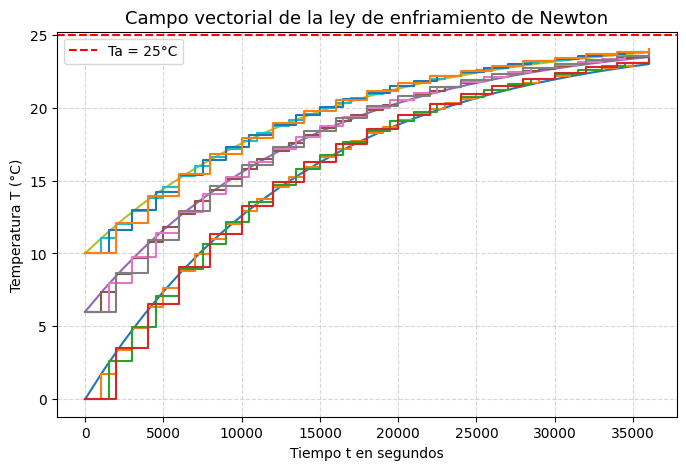

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T0 = [0.0, 6.0, 10.0]
hs = [1000.0, 1500.0, 2000.0]
k = 7e-5          # constante de enfriamiento
Ta = 25         # temperatura ambiente (°C)
t_min, t_max = 0, 10*3600
T_min, T_max = 0, 30

def exact_solution(Ta, T0, k, t):
    return Ta + (T0 - Ta) * np.exp(-k * t)


# Gráfica del campo vectorial

plt.figure(figsize=(8,5))

for T in T0:
    plt.plot(t, exact_solution(Ta, T, k, t))
    for h in hs:
      times, T_e = euler_explicit(k, T, Ta, h, t_max)
      plt.step(times, T_e, where='post')
plt.title("Campo vectorial de la ley de enfriamiento de Newton", fontsize=13)
plt.xlabel("Tiempo t en segundos")
plt.ylabel("Temperatura T (°C)")

# Temperatura ambiente
plt.axhline(Ta, color='r', linestyle='--', label=f"Ta = {Ta}°C")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("grafico_euler.png", dpi=300)
plt.show()

     cerveza  tiempo_min  temperatura
0  Cerveza_1           0     7.399966
1  Cerveza_1           5     8.302354
2  Cerveza_1          10     8.637946
3  Cerveza_1          15     9.286920
4  Cerveza_1          20    10.262611


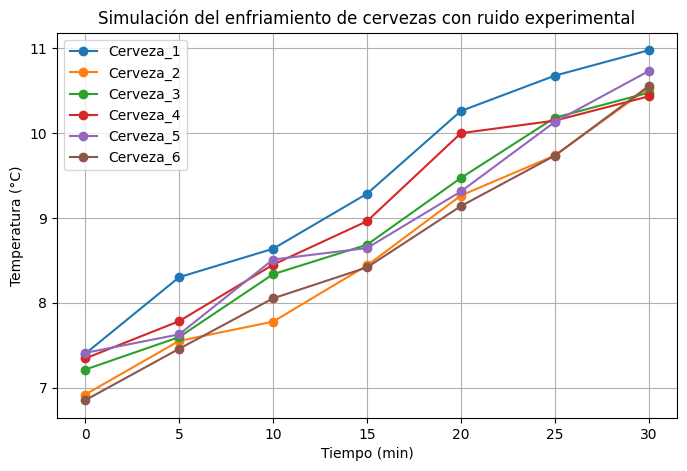

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros físicos
T_amb = 20.4          # Temperatura ambiente (°C)
T0 = 7.0            # Temperatura inicial de la cerveza (°C)
k = 2e-4             # Constante de enfriamiento (1/s)

# Tiempo: 0 a 30 minutos en pasos de 5 min
t_min = np.arange(0, 31, 5)     # minutos
t = t_min * 60                  # convertir a segundos para la ecuación

# Ecuación diferencial de enfriamiento: T(t) = T_amb + (T0 - T_amb)e^{-k t}
def newton_cooling(t, T0, k, T_amb):
    return T_amb + (T0 - T_amb) * np.exp(-k * t)

# Simular 6 cervezas con ligeras variaciones
np.random.seed(42)
data = []

for i in range(1, 7):
    # Pequeña variación en k y temperatura inicial
    k_i = k * np.random.uniform(0.8, 1.2)
    T0_i = T0 + np.random.uniform(-0.3, 0.3)
    T_teorica = newton_cooling(t, T0_i, k_i, T_amb)

    # Añadir ruido experimental (±0.2°C)
    ruido = np.random.normal(0, 0.2, size=len(t))
    T_obs = T_teorica + ruido

    df_i = pd.DataFrame({
        'cerveza': f'Cerveza_{i}',
        'tiempo_min': t_min,
        'temperatura': T_obs
    })
    data.append(df_i)

# Unir todos los datos
df = pd.concat(data, ignore_index=True)

# Mostrar una muestra de la base de datos
print(df.head())

# Graficar
plt.figure(figsize=(8,5))
for i in df['cerveza'].unique():
    sub = df[df['cerveza'] == i]
    plt.plot(sub['tiempo_min'], sub['temperatura'], 'o-', label=i)

plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Simulación del enfriamiento de cervezas con ruido experimental')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
!pip install diffrax equinox optax

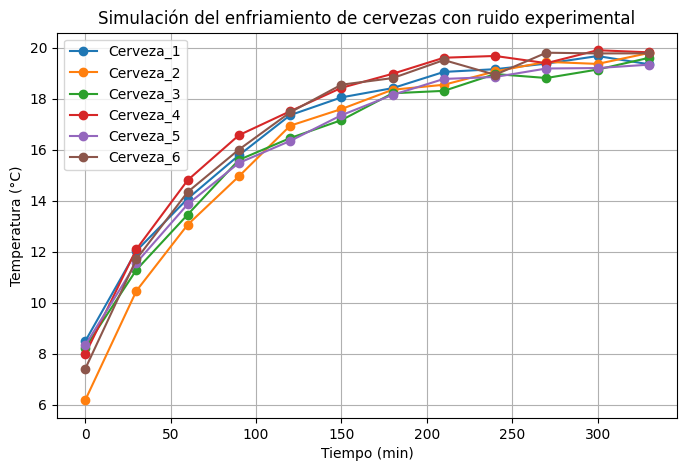

Step 0, Loss = 446041.875000
Step 200, Loss = 12.419432
Step 400, Loss = 0.211677
Step 600, Loss = 0.209652
Step 800, Loss = 0.207385
Step 1000, Loss = 0.204908
Step 1200, Loss = 0.202320
Step 1400, Loss = 0.199714
Step 1600, Loss = 0.197160
Step 1800, Loss = 0.194717


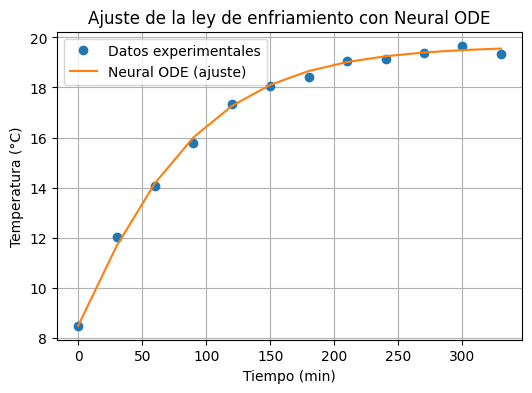

In [70]:
import time
import diffrax
import equinox as eqx
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax
import numpy as np
import pandas as pd

# -------------------------
# 1️⃣ Generación de datos experimentales
# -------------------------
def get_data_experimental():
    T_amb = 20.0       # Temperatura ambiente (°C)
    T0 = 7.0           # Temperatura inicial (°C)
    k = 2e-4           # Constante de enfriamiento (1/s)

    # Tiempo: 0 a 350 min cada 30 min
    t_min = np.arange(0, 350, 30)
    t = t_min * 60  # segundos

    def newton_cooling(t, T0, k, T_amb):
        return T_amb + (T0 - T_amb) * np.exp(-k * t)

    np.random.seed(42)
    data = []

    for i in range(1, 7):
        k_i = k * np.random.uniform(0.8, 1.2)
        T0_i = T0 + np.random.uniform(-1.5, 1.5)
        T_teorica = newton_cooling(t, T0_i, k_i, T_amb)
        ruido = np.random.normal(0, 0.2, size=len(t))
        T_obs = T_teorica + ruido

        df_i = pd.DataFrame({
            'cerveza': f'Cerveza_{i}',
            'tiempo_min': t_min,
            'temperatura': T_obs
        })
        data.append(df_i)

    df = pd.concat(data, ignore_index=True)

    # Visualización inicial
    plt.figure(figsize=(8, 5))
    for i in df['cerveza'].unique():
        sub = df[df['cerveza'] == i]
        plt.plot(sub['tiempo_min'], sub['temperatura'], 'o-', label=i)
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Simulación del enfriamiento de cervezas con ruido experimental')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Preparar salida
    ts = jnp.array(t_min, dtype=jnp.float32)
    cervezas = df['cerveza'].unique()
    ys = jnp.stack([
        jnp.expand_dims(jnp.array(df[df['cerveza'] == c]['temperatura'].values, dtype=jnp.float32), axis=1)
        for c in cervezas
    ])  # (num_cervezas, num_tiempos, 1)
    return ts, ys


# -------------------------
# 2️⃣ Definición del modelo
# -------------------------
class Func(eqx.Module):
    mlp: eqx.nn.MLP
    def __init__(self, data_size, width_size, depth, *, key):
        self.mlp = eqx.nn.MLP(
            in_size=data_size,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            key=key,
        )

    def __call__(self, t, y, args):
        return self.mlp(y)


class NeuralODE(eqx.Module):
    func: Func
    def __init__(self, data_size, width_size, depth, *, key):
        self.func = Func(data_size, width_size, depth, key=key)

    def __call__(self, ts, y0):
        # ✅ Corrección: evitar concretización
        dt0 = (ts[1] - ts[0]).astype(jnp.float32)
        sol = diffrax.diffeqsolve(
            diffrax.ODETerm(self.func),
            diffrax.Tsit5(),
            t0=ts[0],
            t1=ts[-1],
            dt0=dt0,
            y0=y0,
            saveat=diffrax.SaveAt(ts=ts),
        )
        return sol.ys


# -------------------------
# 3️⃣ Entrenamiento
# -------------------------
def main(seed=42, width_size=16, depth=3, steps=2000, lr=3e-3):
    key = jr.PRNGKey(seed)
    ts, ys = get_data_experimental()
    y0 = ys[:, 0, :]  # (num_cervezas, 1)
    data_size = ys.shape[-1]

    model = NeuralODE(data_size, width_size, depth, key=key)
    optim = optax.adabelief(lr)
    opt_state = optim.init(eqx.filter(model, eqx.is_inexact_array))

    @eqx.filter_value_and_grad
    def loss_fn(model):
        # Vectorizamos sobre cervezas
        y_pred = jax.vmap(lambda y0_i: model(ts, y0_i))(y0)
        return jnp.mean((ys - y_pred) ** 2)

    @eqx.filter_jit
    def train_step(model, opt_state):
        loss, grads = loss_fn(model)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    for step in range(steps):
        loss, model, opt_state = train_step(model, opt_state)
        if step % 200 == 0:
            print(f"Step {step}, Loss = {loss:.6f}")

    # -------------------------
    # 4️⃣ Visualización
    # -------------------------
    y_pred = model(ts, y0[0])
    plt.figure(figsize=(6, 4))
    plt.plot(ts, ys[0, :, 0], 'o', label="Datos experimentales")
    plt.plot(ts, y_pred[:, 0], '-', label="Neural ODE (ajuste)")
    plt.xlabel("Tiempo (min)")
    plt.ylabel("Temperatura (°C)")
    plt.legend()
    plt.grid(True)
    plt.title("Ajuste de la ley de enfriamiento con Neural ODE")
    plt.show()

    return model


# Ejecutar
if __name__ == "__main__":
    model = main()


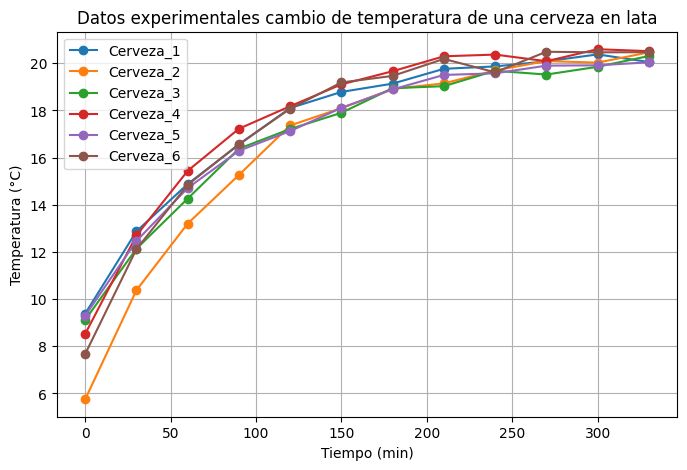

Step 0, Loss = 426241.656250
Step 200, Loss = 10.823634
Step 400, Loss = 0.216052
Step 600, Loss = 0.214332
Step 800, Loss = 0.212357
Step 1000, Loss = 0.210208
Step 1200, Loss = 0.207970
Step 1400, Loss = 0.205713
Step 1600, Loss = 0.203506
Step 1800, Loss = 0.201395


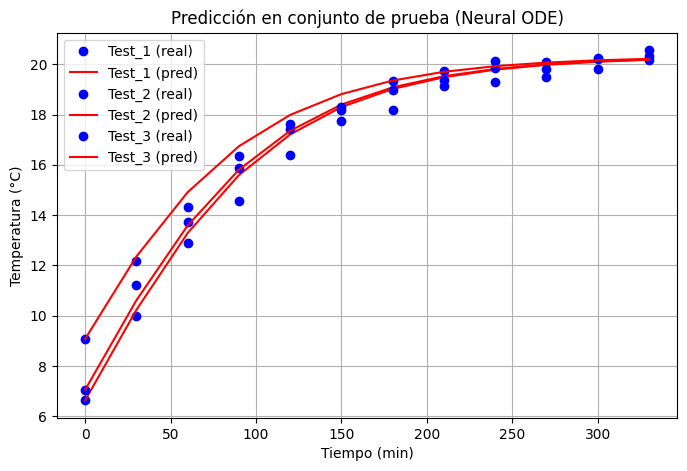

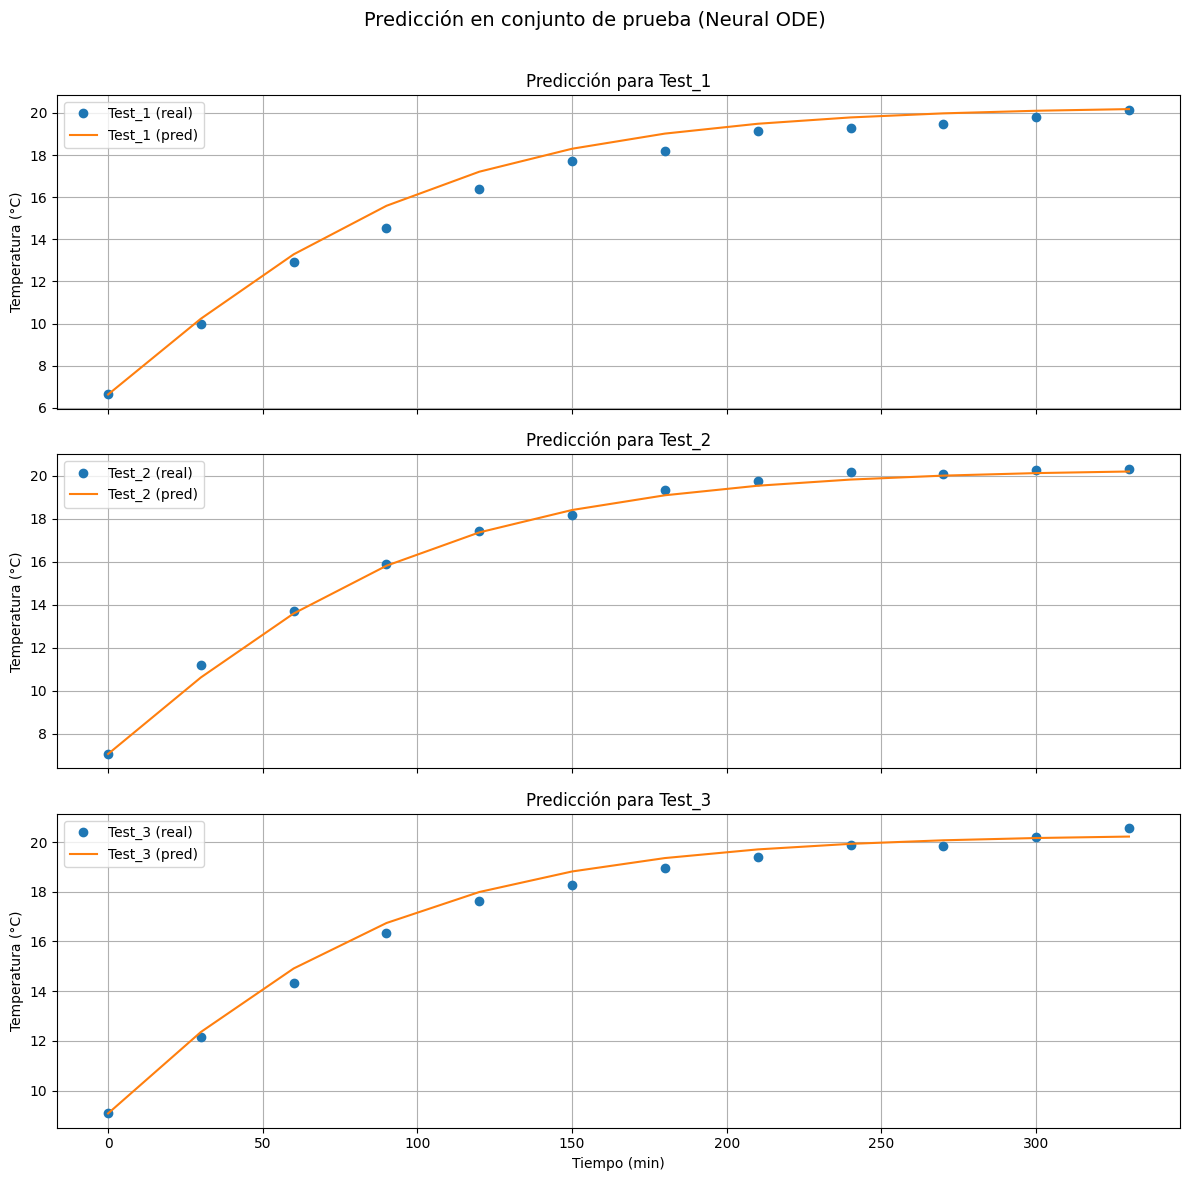

In [78]:
import time
import diffrax
import equinox as eqx
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax
import numpy as np
import pandas as pd

# -------------------------
# 1️⃣ Datos de entrenamiento
# -------------------------
def get_data_experimental():
    T_amb = 20.7
    T0 = 7.0
    k = 2e-4

    t_min = np.arange(0, 350, 30)
    t = t_min * 60

    def newton_cooling(t, T0, k, T_amb):
        return T_amb + (T0 - T_amb) * np.exp(-k * t)

    np.random.seed(42)
    data = []

    for i in range(1, 7):
        k_i = k * np.random.uniform(0.8, 1.2)
        T0_i = T0 + np.random.uniform(-2.5, 2.5)
        T_teorica = newton_cooling(t, T0_i, k_i, T_amb)
        ruido = np.random.normal(0, 0.2, size=len(t))
        T_obs = T_teorica + ruido

        df_i = pd.DataFrame({
            'cerveza': f'Cerveza_{i}',
            'tiempo_min': t_min,
            'temperatura': T_obs
        })
        data.append(df_i)

    df = pd.concat(data, ignore_index=True)
    # Visualización inicial
    plt.figure(figsize=(8, 5))
    for i in df['cerveza'].unique():
        sub = df[df['cerveza'] == i]
        plt.plot(sub['tiempo_min'], sub['temperatura'], 'o-', label=i)
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Datos experimentales cambio de temperatura de una cerveza en lata')
    plt.legend()
    plt.grid(True)
    plt.savefig("cervezas_prueba.png", dpi=300)
    plt.show()

    ts = jnp.array(t_min, dtype=jnp.float32)
    cervezas = df['cerveza'].unique()
    ys = jnp.stack([
        jnp.expand_dims(jnp.array(df[df['cerveza'] == c]['temperatura'].values, dtype=jnp.float32), axis=1)
        for c in cervezas
    ])
    return ts, ys


# -------------------------
# 2️⃣ Datos de prueba
# -------------------------
def get_data_test():
    T_amb = 20.7
    T0 = 7.0
    k = 2e-4

    t_min = np.arange(0, 350, 30)
    t = t_min * 60

    def newton_cooling(t, T0, k, T_amb):
        return T_amb + (T0 - T_amb) * np.exp(-k * t)

    np.random.seed(969)  # 🔸 Semilla diferente
    data = []

    for i in range(1, 4):  # 3 cervezas nuevas
        k_i = k * np.random.uniform(0.7, 1.1)
        T0_i = T0 + np.random.uniform(-1.9, 2.2)
        T_teorica = newton_cooling(t, T0_i, k_i, T_amb)
        ruido = np.random.normal(0, 0.15, size=len(t))  # un poco de ruido
        T_obs = T_teorica + ruido

        df_i = pd.DataFrame({
            'cerveza': f'Test_{i}',
            'tiempo_min': t_min,
            'temperatura': T_obs
        })
        data.append(df_i)

    df = pd.concat(data, ignore_index=True)

    ts = jnp.array(t_min, dtype=jnp.float32)
    cervezas = df['cerveza'].unique()
    ys = jnp.stack([
        jnp.expand_dims(jnp.array(df[df['cerveza'] == c]['temperatura'].values, dtype=jnp.float32), axis=1)
        for c in cervezas
    ])
    return ts, ys, df


# -------------------------
# 3️⃣ Modelo
# -------------------------
class Func(eqx.Module):
    mlp: eqx.nn.MLP
    def __init__(self, data_size, width_size, depth, *, key):
        self.mlp = eqx.nn.MLP(
            in_size=data_size,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            key=key,
        )

    def __call__(self, t, y, args):
        return self.mlp(y)


class NeuralODE(eqx.Module):
    func: Func
    def __init__(self, data_size, width_size, depth, *, key):
        self.func = Func(data_size, width_size, depth, key=key)

    def __call__(self, ts, y0):
        dt0 = (ts[1] - ts[0]).astype(jnp.float32)
        sol = diffrax.diffeqsolve(
            diffrax.ODETerm(self.func),
            diffrax.Tsit5(),
            t0=ts[0],
            t1=ts[-1],
            dt0=dt0,
            y0=y0,
            saveat=diffrax.SaveAt(ts=ts),
        )
        return sol.ys


# -------------------------
# 4️⃣ Entrenamiento + prueba
# -------------------------
def main(seed=42, width_size=16, depth=3, steps=2000, lr=3e-3):
    key = jr.PRNGKey(seed)
    ts, ys = get_data_experimental()
    y0 = ys[:, 0, :]
    data_size = ys.shape[-1]

    model = NeuralODE(data_size, width_size, depth, key=key)
    optim = optax.adabelief(lr)
    opt_state = optim.init(eqx.filter(model, eqx.is_inexact_array))

    @eqx.filter_value_and_grad
    def loss_fn(model):
        y_pred = jax.vmap(lambda y0_i: model(ts, y0_i))(y0)
        return jnp.mean((ys - y_pred) ** 2)

    @eqx.filter_jit
    def train_step(model, opt_state):
        loss, grads = loss_fn(model)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    for step in range(steps):
        loss, model, opt_state = train_step(model, opt_state)
        if step % 200 == 0:
            print(f"Step {step}, Loss = {loss:.6f}")

    # -------------------------
    # 🔹 Evaluación con datos de prueba
    # -------------------------
    ts_test, ys_test, df_test = get_data_test()
    y0_test = ys_test[:, 0, :]

    # Predicciones
    y_pred_test = jax.vmap(lambda y0_i: model(ts_test, y0_i))(y0_test)

    # -------------------------
    # 🔹 Visualización
    # -------------------------
    plt.figure(figsize=(8, 5))
    for i, c in enumerate(df_test['cerveza'].unique()):
        plt.plot(ts_test, ys_test[i, :, 0], 'o', color='b', label=f"{c} (real)")
        plt.plot(ts_test, y_pred_test[i, :, 0], '-', color='r', label=f"{c} (pred)")
    plt.xlabel("Tiempo (min)")
    plt.ylabel("Temperatura (°C)")
    plt.title("Predicción en conjunto de prueba (Neural ODE)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Crear figura con 3 subplots verticales
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    cervezas = df_test['cerveza'].unique()

    for i, c in enumerate(cervezas):
        ax = axes[i]
        ax.plot(ts_test, ys_test[i, :, 0], 'o', label=f"{c} (real)")
        ax.plot(ts_test, y_pred_test[i, :, 0], '-', label=f"{c} (pred)")
        ax.set_ylabel("Temperatura (°C)")
        ax.set_title(f"Predicción para {c}")
        ax.legend()
        ax.grid(True)

    axes[-1].set_xlabel("Tiempo (min)")
    fig.suptitle("Predicción en conjunto de prueba (Neural ODE)", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig("resultados.png", dpi=300)
    plt.show()

    return model


# Ejecutar
if __name__ == "__main__":
    model = main()
